## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))


# https://docs.google.com/document/d/1oqTuVMa5Lxf6z8ybF7eirtuWEFekJJ6nwudhE7ZjNSY/edit#heading=h.idcca0tmwa6a

variables = {'initial_gdp': 23*T,
             'tai_flop_size': sq.norm(23, 35, credibility=80),
             'algo_doubling_rate_max': 1,
             'algo_doubling_rate_min': 1,
             'min_reduction': 2,
             'max_reduction': 5,
             'initial_flop_per_dollar': 18.3,
             'flop_halving_rate': sq.norm(2.5, 3),       # https://epochai.org/blog/predicting-gpu-performance
             'max_flop_per_dollar': sq.lognorm(21, 24),  # https://epochai.org/blog/predicting-gpu-performance
             'initial_pay': 9,
             'gdp_growth': 1.03,
             'max_gdp_frac': 0.01,
             'spend_doubling_time': sq.lognorm(1, 2),
             'initial_chance_of_nonscaling_issue': 0.99,
             'final_chance_of_nonscaling_issue': 0.01,
             'nonscaling_issue_bottom_year': 2027,
             'nonscaling_delay': 3}


print('Loaded')


Loaded


## Run short timelines sketch model

Deriving nonscaling delay curve...
|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.08018  | 0.48      | 5.264     | 7.236     |
| 22        | -0.07851  | 2.411     | 7.221     | 0.8068    |
| 34        | -0.06593  | 1.241     | 2.878     | 0.5589    |
| 70        | -0.006856 | 0.01      | 1.05      | 2.345     |
| 74        | -0.004057 | 0.01      | 3.579     | 3.293     |
| 75        | -0.001247 | 0.01      | 5.025     | 3.38      |
Curve params found
{'push': 0.01, 'shift': 5.024790061187339, 'slope': 3.3796700218151767}
-
## RUN TIMELINES MODEL ##
Generating Bayes net...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1682.64it/s]


Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2026',
 '10%: 2026',
 '15%: 2026',
 '20%: 2026',
 '25%: 2026',
 '35%: 2026',
 '50%: 2027',
 '60%: 2028',
 '75%: 2033',
 '80%: 2036',
 '90%: 2043',
 '95%: 2058']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 3 years from now',
 '10%: 3 years from now',
 '15%: 3 years from now',
 '20%: 3 years from now',
 '25%: 3 years from now',
 '35%: 3 years from now',
 '50%: 4 years from now',
 '60%: 5 years from now',
 '75%: 10 years from now',
 '80%: 13 years from now',
 '90%: 20 years from now',
 '95%: 35 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 0.3%
2024-2027: 42.9%
2028-2029: 21.4%
2030-2034: 12.6%
2035-2039: 8.3%
2040-2049: 7.2%
2050-2059: 2.5%
2060-2069: 1.2%
2070-2079: 0.5%
2080-2089: 0.3%
2090-2099: 0.3%
2100-2109: 0.3%
2110-2119: 0.2%
>2120: 1.9%
-
## TAI ARRIVAL DATE BY YEAR - COMPARE TO BENCHMARK ##
By EOY 2024: 0.4%
By EOY 2025: 2.9%
By EOY 

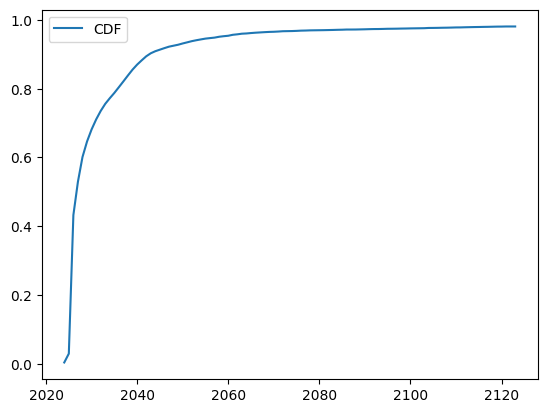

<string>:111: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:112: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

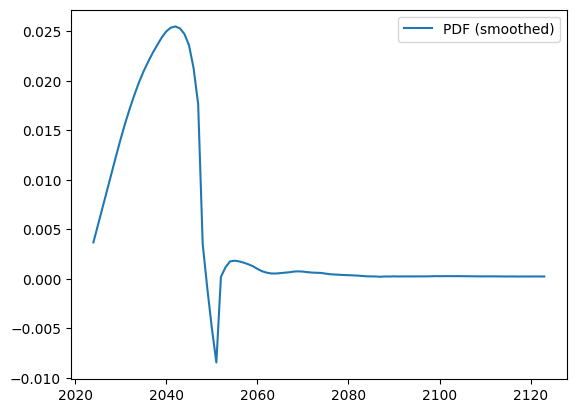

-
-
## TAI FLOP SIZE ##
{1: 17.9,
 5: 21.7,
 10: 23.3,
 20: 24.9,
 30: 26.4,
 40: 27.6,
 50: 28.8,
 60: 29.9,
 70: 31.1,
 80: 32.7,
 90: 34.9,
 95: 36.4,
 99: 39.9}


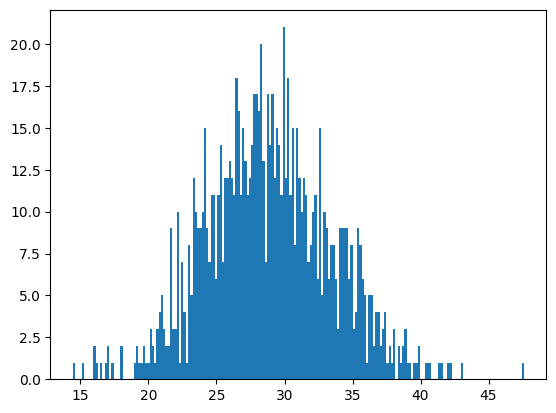

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 1 ##
-
## MAX ALGO DOUBLING RATE: 1 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE ##
{1: 3.1,
 5: 3.0,
 10: 2.9,
 20: 2.9,
 30: 2.8,
 40: 2.8,
 50: 2.8,
 60: 2.7,
 70: 2.7,
 80: 2.6,
 90: 2.6,
 95: 2.5,
 99: 2.5}


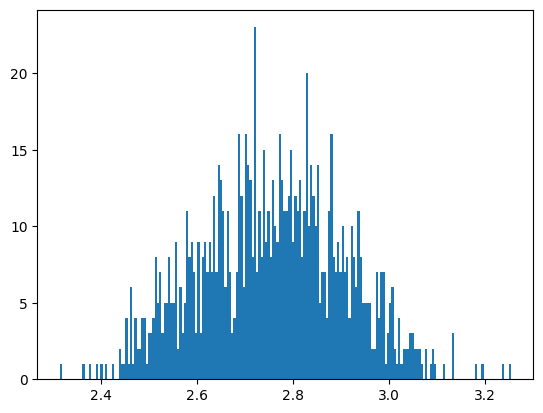

-
-
## MAX FLOP PER DOLLAR ##
{1: 20.4,
 5: 21.0,
 10: 21.4,
 20: 21.7,
 30: 22.0,
 40: 22.2,
 50: 22.4,
 60: 22.6,
 70: 22.9,
 80: 23.2,
 90: 23.6,
 95: 23.9,
 99: 24.6}


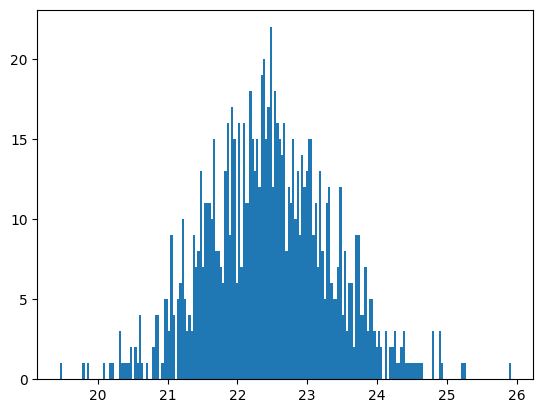

-
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## NONSCALING DELAY: 3 ##
-
## INITIAL CHANCE OF NONSCALING ISSUE: 0.99 ##
-
## FINAL CHANCE OF NONSCALING ISSUE: 0.01 ##
-
## NONSCALING BOTTOM YEAR: 2027 ##
-
## SPEND DOUBLING TIME ##
{1: 2.3,
 5: 2.1,
 10: 1.9,
 20: 1.7,
 30: 1.6,
 40: 1.5,
 50: 1.4,
 60: 1.3,
 70: 1.3,
 80: 1.2,
 90: 1.1,
 95: 1.0,
 99: 0.9}


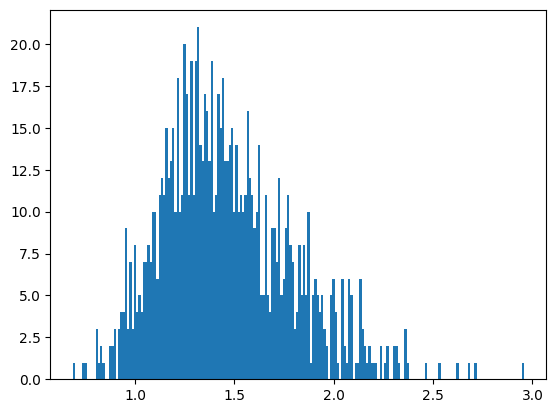

-
-
-
-
## GDP Over Time ##


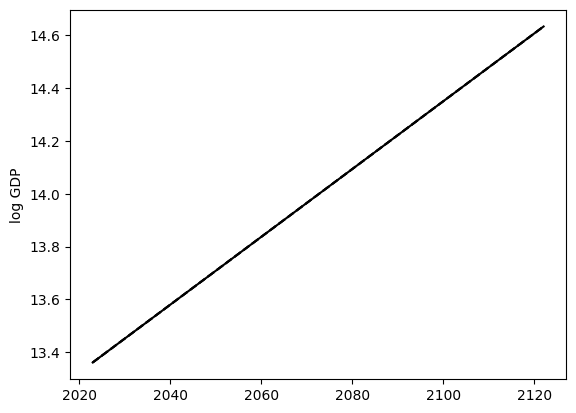

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

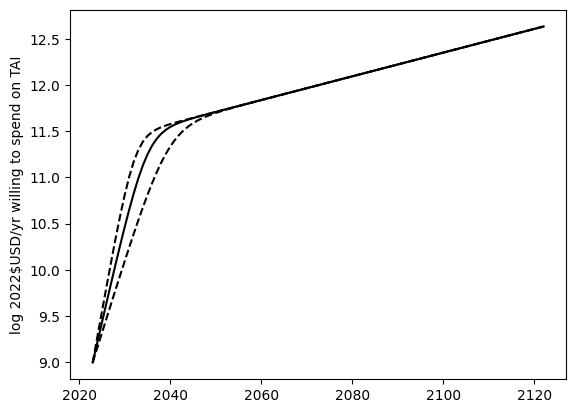

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~1 billion) - 9.3 (~2 billion)
Year: 2025 - willingness log 2022$USD per year 9.4 (~3 billion) 90% CI 9.3 (~2 billion) - 9.5 (~3 billion)
Year: 2026 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.5 (~3 billion) - 9.8 (~6 billion)
Year: 2027 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.6 (~4 billion) - 10.1 (~12 billion)
Year: 2028 - willingness log 2022$USD per year 10.1 (~11 billion) 90% CI 9.8 (~6 billion) - 10.3 (~21 billion)
Year: 2029 - willingness log 2022$USD per year 10.3 (~18 billion) 90% CI 9.9 (~9 billion) - 10.6 (~38 billion)
Year: 2030 - willingness log 2022$USD per year 10.5 (~29 billion) 90% CI 10.1 (~12 billion) - 10.8 (~64 billion)
Year: 2031 - willingness log 2022$USD per year 10.6 (~44 billion) 90% CI 10.2 (~17 billion) - 11.0 (~101 billion)
Year: 20

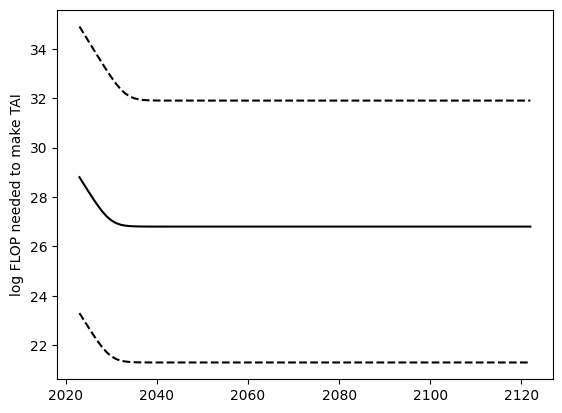

Year: 2023 - log FLOP needed for TAI 28.8 (~63 octillion) 90% CI 23.3 (~200 sextillion) - 34.9 (~79 decillion)
Year: 2024 - log FLOP needed for TAI 28.5 (~32 octillion) 90% CI 23.0 (~102 sextillion) - 34.6 (~40 decillion)
Year: 2025 - log FLOP needed for TAI 28.2 (~16 octillion) 90% CI 22.7 (~52 sextillion) - 34.3 (~20 decillion)
Year: 2026 - log FLOP needed for TAI 27.9 (~9 octillion) 90% CI 22.4 (~27 sextillion) - 34.0 (~10 decillion)
Year: 2027 - log FLOP needed for TAI 27.7 (~5 octillion) 90% CI 22.2 (~14 sextillion) - 33.7 (~5 decillion)
Year: 2028 - log FLOP needed for TAI 27.4 (~3 octillion) 90% CI 21.9 (~8 sextillion) - 33.4 (~3 decillion)
Year: 2029 - log FLOP needed for TAI 27.2 (~2 octillion) 90% CI 21.7 (~5 sextillion) - 33.1 (~1 decillion)
Year: 2030 - log FLOP needed for TAI 27.1 (~1 octillion) 90% CI 21.6 (~4 sextillion) - 32.8 (~700 nonillion)
Year: 2031 - log FLOP needed for TAI 26.9 (~877 septillion) 90% CI 21.4 (~3 sextillion) - 32.6 (~390 nonillion)
Year: 2032 - log

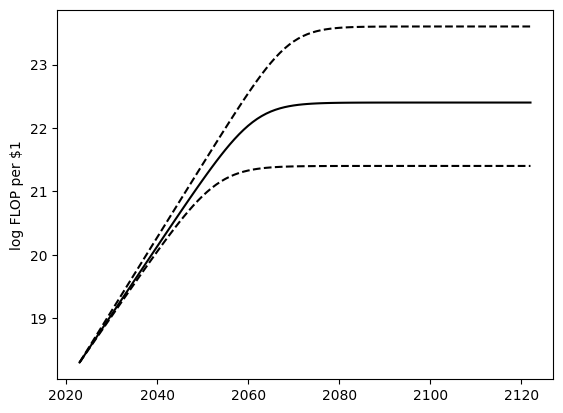

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.6 (~4 quintillion) 90% CI 18.6 (~4 quintillion) - 18.6 (~4 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.8 (~7 quintillion) 90% CI 18.8 (~7 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 18.9 (~9 quintillion) 90% CI 18.9 (~8 quintillion) - 19.0 (~10 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~11 quintillion) 90% CI 19.0 (~11 quintillion) - 19.1 (~13 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.2 (~14 quintillion) 90% CI 19.1 (~13 quintillion) - 19.2 (~17 quintil

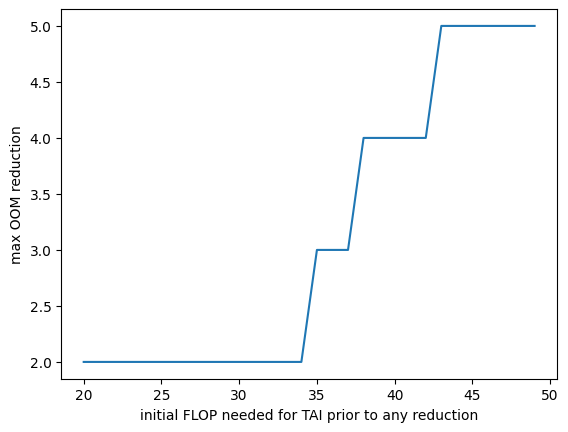

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

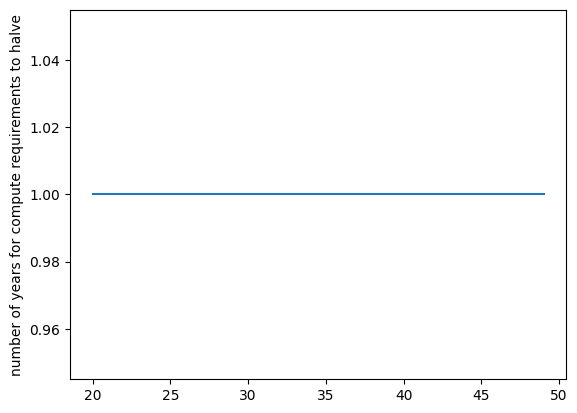

TAI log FLOP 20 -> algo doubling rate 1.0yrs
TAI log FLOP 21 -> algo doubling rate 1.0yrs
TAI log FLOP 22 -> algo doubling rate 1.0yrs
TAI log FLOP 23 -> algo doubling rate 1.0yrs
TAI log FLOP 24 -> algo doubling rate 1.0yrs
TAI log FLOP 25 -> algo doubling rate 1.0yrs
TAI log FLOP 26 -> algo doubling rate 1.0yrs
TAI log FLOP 27 -> algo doubling rate 1.0yrs
TAI log FLOP 28 -> algo doubling rate 1.0yrs
TAI log FLOP 29 -> algo doubling rate 1.0yrs
TAI log FLOP 30 -> algo doubling rate 1.0yrs
TAI log FLOP 31 -> algo doubling rate 1.0yrs
TAI log FLOP 32 -> algo doubling rate 1.0yrs
TAI log FLOP 33 -> algo doubling rate 1.0yrs
TAI log FLOP 34 -> algo doubling rate 1.0yrs
TAI log FLOP 35 -> algo doubling rate 1.0yrs
TAI log FLOP 36 -> algo doubling rate 1.0yrs
TAI log FLOP 37 -> algo doubling rate 1.0yrs
TAI log FLOP 38 -> algo doubling rate 1.0yrs
TAI log FLOP 39 -> algo doubling rate 1.0yrs
TAI log FLOP 40 -> algo doubling rate 1.0yrs
TAI log FLOP 41 -> algo doubling rate 1.0yrs
TAI log FL

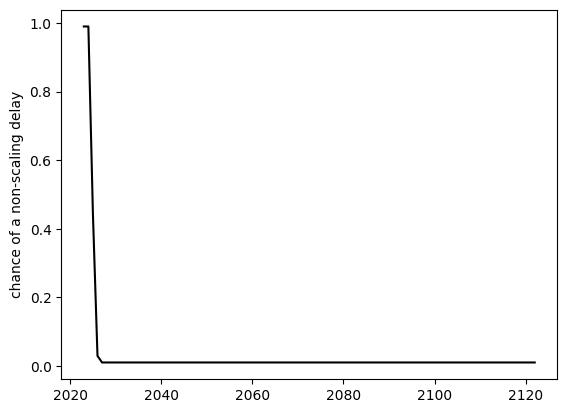

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 99%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 99%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 44%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 1%
Year: 2033 - chan

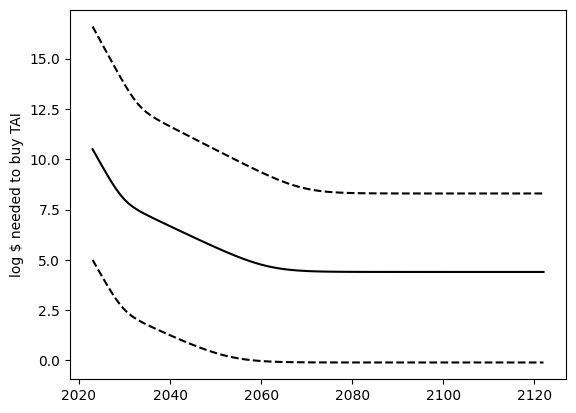

Year: 2023 - 10.5 log 2022$USD to buy TAI (~32 billion) 90% CI 5.0 (~100 thousand) - 16.6 (~40 quadrillion)
Year: 2024 - 10.1 log 2022$USD to buy TAI (~13 billion) 90% CI 4.6 (~40 thousand) - 16.2 (~15 quadrillion)
Year: 2025 - 9.7 log 2022$USD to buy TAI (~5 billion) 90% CI 4.2 (~16 thousand) - 15.8 (~6 quadrillion)
Year: 2026 - 9.3 log 2022$USD to buy TAI (~2 billion) 90% CI 3.8 (~7 thousand) - 15.4 (~2 quadrillion)
Year: 2027 - 8.9 log 2022$USD to buy TAI (~852 million) 90% CI 3.4 (~3 thousand) - 14.9 (~870 trillion)
Year: 2028 - 8.6 log 2022$USD to buy TAI (~378 million) 90% CI 3.1 (~1 thousand) - 14.5 (~339 trillion)
Year: 2029 - 8.3 log 2022$USD to buy TAI (~184 million) 90% CI 2.8 (~612.7569437391703) - 14.1 (~134 trillion)
Year: 2030 - 8.0 log 2022$USD to buy TAI (~100 million) 90% CI 2.5 (~335.6874744874048) - 13.7 (~54 trillion)
Year: 2031 - 7.8 log 2022$USD to buy TAI (~61 million) 90% CI 2.3 (~206.59071688097137) - 13.4 (~23 trillion)
Year: 2032 - 7.6 log 2022$USD to buy TA

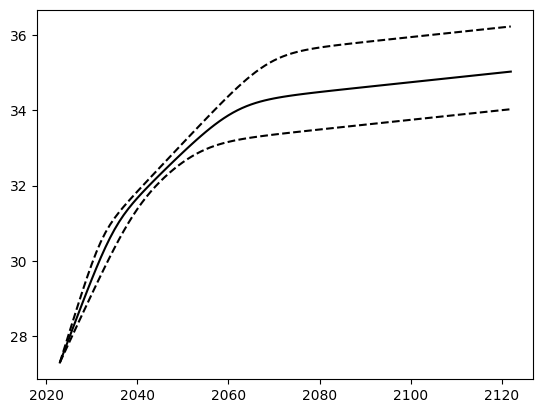

Year: 2023 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log FLOP 27.6 (~4 octillion) 90% CI 27.6 (~4 octillion) - 27.7 (~5 octillion)
Year: 2025 - max log FLOP 27.9 (~9 octillion) 90% CI 27.8 (~7 octillion) - 28.1 (~12 octillion)
Year: 2026 - max log FLOP 28.3 (~18 octillion) 90% CI 28.1 (~12 octillion) - 28.5 (~29 octillion)
Year: 2027 - max log FLOP 28.6 (~38 octillion) 90% CI 28.3 (~22 octillion) - 28.8 (~69 octillion)
Year: 2028 - max log FLOP 28.9 (~78 octillion) 90% CI 28.6 (~40 octillion) - 29.2 (~162 octillion)
Year: 2029 - max log FLOP 29.2 (~160 octillion) 90% CI 28.9 (~72 octillion) - 29.6 (~374 octillion)
Year: 2030 - max log FLOP 29.5 (~324 octillion) 90% CI 29.1 (~130 octillion) - 29.9 (~822 octillion)
Year: 2031 - max log FLOP 29.8 (~643 octillion) 90% CI 29.4 (~234 octillion) - 30.2 (~2 nonillion)
Year: 2032 - max log FLOP 30.1 (~1 nonillion) 90% CI 29.6 (~417 octillion) - 30.5 (~3 nonillion)
Year: 2033 - max log F

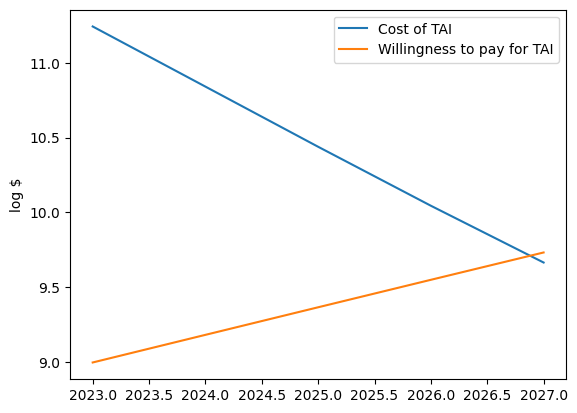

-
-
## SAMPLE RUN 2 ##
It takes 24.8 log FLOP (~6 septillion) for transformative capabilities.
Every 1 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.9 years they get 2x cheaper, to a maximum of 23.6 log FLOP (~369 sextillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 1.0 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 3 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 24.8 log FLOP (6 septillion) - log $ 6.5 to buy TAI (3 million) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
-- Nonscaling delay occured p_nonscaling_issue=0.99
/!\ FLOP for TAI sufficient but needs 3 more years to solve non-scaling issues
Year: 2024 - 27.7 max log FLOP (5 octillio

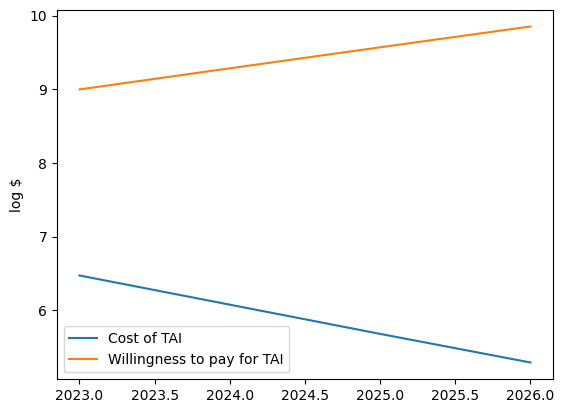

-
-
## SAMPLE RUN 3 ##
It takes 30.8 log FLOP (~6 nonillion) for transformative capabilities.
Every 1 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.8 years they get 2x cheaper, to a maximum of 22.7 log FLOP (~49 sextillion) per 2022$USD.
We are willing to pay 9.0 log 2022$USD (~1 billion) and this doubles every 1.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
If a non-scaling delay happens, it will take an additional 3 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 30.8 log FLOP (6 nonillion) - log $ 12.5 to buy TAI (3 trillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 27.6 max log FLOP (4 octillion) available - TAI takes 30.5 log FLOP (3 nonillion) - log $ 12.1 to buy TAI (1 trillion) vs. willingness to pay log $ 9.2 (2 billio

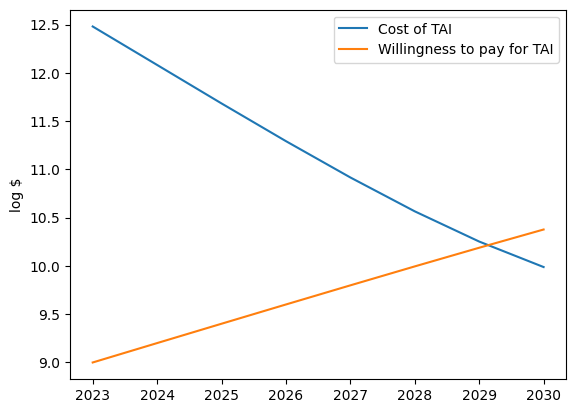

In [3]:
run_timelines_model(variables, runs=RUNS)